In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# 데이터 불러오기
data = pd.read_csv('df_ibk_v1.csv')

# NaN 값을 적절한 값으로 대체
data.fillna(method='ffill', inplace=True)

# 범주형 변수를 라벨 인코딩
label_encoders = {}
for column in ['gender', 'discount_type', 'genre']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# 데이터 분할
X = data.drop(['price'], axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
import pandas as pd
from io import StringIO



# 'play_date' 칼럼을 datetime 데이터 타입으로 변환
data['play_date'] = pd.to_datetime(data['play_date'], format='%Y%m%d')

# 'play_date' 칼럼을 기준으로 데이터프레임 정렬
df_sorted = data.sort_values('play_date')

# 결과 출력
print(df_sorted)


        Unnamed: 0   age  gender  tran_date  tran_time  play_date  \
118965     1875876  40.0       0   20181113       1623 2018-11-17   
223927     1725193  40.0       0   20181111       1459 2018-11-17   
273470      373845  40.0       0   20181113       1623 2018-11-17   
109257      237641  40.0       0   20181111        909 2018-11-17   
106441      821716  50.0       1   20181110        908 2018-11-17   
...            ...   ...     ...        ...        ...        ...   
22620      1219780  50.0       0   20230512       2139 2023-07-07   
22805      1073976  50.0       0   20230512       2146 2023-07-07   
40164       772146  40.0       1   20230505       1109 2023-07-07   
32076      1562080  40.0       0   20230515        138 2023-07-07   
69755        12461  20.0       1   20230703       1030 2023-07-07   

        play_st_time  price  ticket_cancel  discount_type  performance_code  \
118965          2000      0              0            310              1674   
223927       

In [12]:
# #keras, TF 이용하여 신경망 구축
# 

In [13]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# 
# # 모델 구축
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1, activation='linear')
# ])
# 
# # 모델 컴파일
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])
# 
# # 모델 훈련
# model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.1)
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
# 모델 구축

In [14]:
from sklearn.model_selection import train_test_split
import pandas as pd
# 데이터 로드 및 날짜 열을 datetime으로 변환
data = pd.read_csv('df_ibk_v1.csv', parse_dates=['tran_date'], index_col='tran_date')

# 'price' 열만 사용하여 훈련 및 테스트 데이터로 분할
train_data, test_data = train_test_split(data['price'], test_size=0.2, shuffle=False)

# 
# 위 오류 메시지들은 SARIMAX 모델이 시간 인덱스에 관한 문제를 발견했음을 나타냅니다. 여러 문제가 지적되고 있지만, 기본적으로는 다음 두 가지 문제가 있습니다:
# 
# 날짜 인덱스에 연관된 빈도 정보가 없다 (e.g., 일별, 월별).
# 날짜 인덱스가 단조롭지 않다 (즉, 날짜가 일정한 간격으로 정렬되어 있지 않다).
# 먼저 데이터 프레임의 인덱스를 처리하여 이러한 문제를 해결해야 합니다.
# 
# 다음 단계를 수행하여 문제를 해결할 수 있습니다:
# 날짜 인덱스를 단조롭게 만들어야 합니다. 이것은 데이터 프레임을 인덱스로 정렬하여 수행할 수 있습니다.
# 날짜 인덱스에 빈도를 지정해야 합니다. 빈도를 지정하는 방법은 다양하지만, 여기에는 'D' (일일), 'M' (월별) 등의 옵션이 있습니다.
train_data.sort_index(inplace=True) 
test_data.sort_index(inplace=True)

In [23]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Early stopping 추가
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# 모델 훈련 (batch size 증가, epochs 증가)
history = model.fit(X_train, y_train, epochs=20000, batch_size=10000, validation_split=0.1, callbacks=[early_stopping])



Epoch 1/20000
35/35 [==============================] - 1s 18ms/step - loss: 356467808.0000 - mean_absolute_error: 8128.3677 - val_loss: 359503392.0000 - val_mean_absolute_error: 8176.4546
Epoch 2/20000
35/35 [==============================] - 1s 15ms/step - loss: 354872672.0000 - mean_absolute_error: 8145.5425 - val_loss: 354888544.0000 - val_mean_absolute_error: 8219.9404
Epoch 3/20000
35/35 [==============================] - 1s 16ms/step - loss: 339977248.0000 - mean_absolute_error: 8268.1426 - val_loss: 320393120.0000 - val_mean_absolute_error: 8480.5518
Epoch 4/20000
35/35 [==============================] - 1s 16ms/step - loss: 277701600.0000 - mean_absolute_error: 8823.5615 - val_loss: 230986848.0000 - val_mean_absolute_error: 9402.9258
Epoch 5/20000
35/35 [==============================] - 1s 16ms/step - loss: 219117568.0000 - mean_absolute_error: 9735.1523 - val_loss: 200300336.0000 - val_mean_absolute_error: 9358.7783
Epoch 6/20000
35/35 [==============================] - 1s 15

In [24]:
# 모델 평가
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test MAE: {test_acc}')

2984/2984 [==============================] - 2s 616us/step - loss: 145701552.0000 - mean_absolute_error: 6223.1973
Test Loss: 145701552.0, Test MAE: 6223.197265625


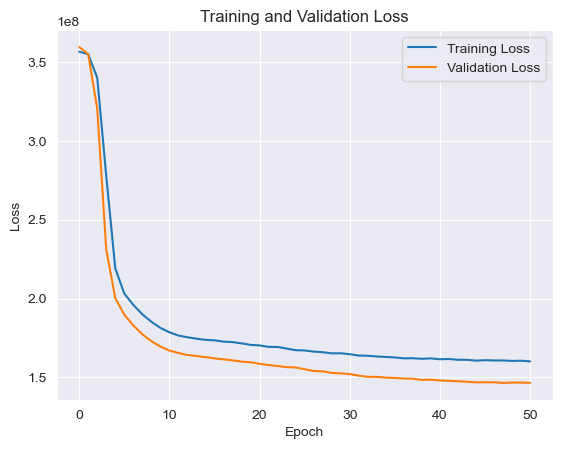

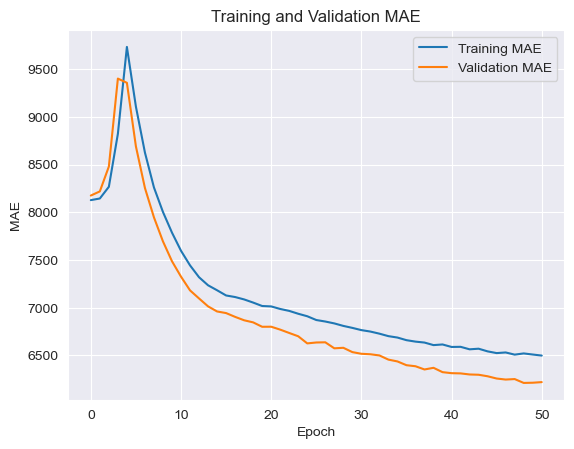

In [25]:
import matplotlib.pyplot as plt



# 손실 그래프
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# MAE 그래프
plt.figure()
plt.plot(history.history['mean_absolute_error'], label='Training MAE')
plt.plot(history.history['val_mean_absolute_error'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()


2984/2984 [==============================] - 2s 530us/step


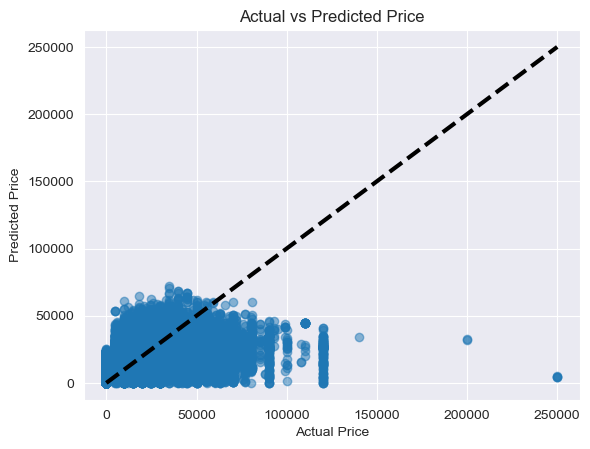

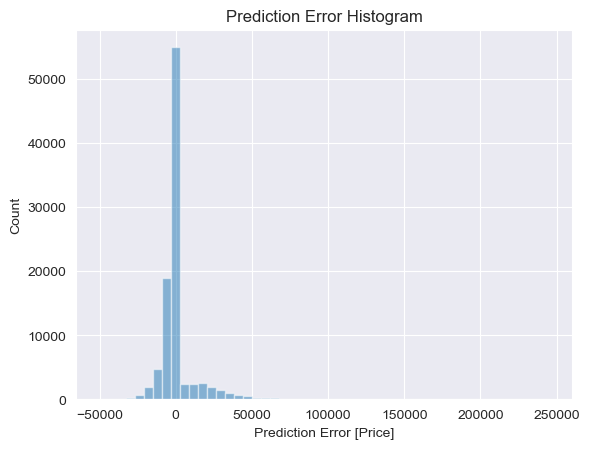

In [26]:
import numpy as np

# 테스트 세트에서 예측
y_pred = model.predict(X_test)

# 실제 값과 예측 값의 scatter plot 생성
plt.scatter(y_test, y_pred.squeeze(), alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

# 예측 오차의 히스토그램
plt.hist(y_test - y_pred.squeeze(), bins=50, alpha=0.5)
plt.xlabel('Prediction Error [Price]')
plt.ylabel('Count')
plt.title('Prediction Error Histogram')
plt.show()

모델의 결과를 시각화하면서 얻는 그래프들을 해석하는 것은 딥러닝 모델을 평가하고 최적화하는 데 중요한 단계입니다. 각 그래프에 따라 다음과 같이 해석할 수 있습니다:

1. **훈련 손실과 검증 손실 그래프**
   
   - **손실 감소**: 초기에는 손실이 빠르게 감소하며, 모델이 학습되면서 점차 줄어들어야 합니다.
   - **검증 손실의 증가**: 검증 손실이 어느 시점부터 증가하기 시작하면, 이는 과적합의 징후일 수 있습니다. 모델이 훈련 데이터에 너무 특화되어 새로운 데이터에 대해 일반화하는 능력이 떨어진 것입니다.
   - **격차**: 훈련 손실과 검증 손실 사이의 큰 차이는 과적합의 징후일 수 있습니다.

2. **실제 값 대 예측 값의 scatter plot**

   - **대각선**: 포인트들이 대각선에 가까울수록 예측이 정확하다는 것을 의미합니다.
   - **분산**: 포인트들이 넓게 퍼져 있으면 예측의 불확실성이 높다는 것을 나타냅니다.
   - **특이점**: 대각선에서 크게 벗어난 포인트들은 잘못된 예측을 나타내며, 이러한 특이점들의 원인을 분석하여 모델을 개선할 수 있습니다.

3. **예측 오차의 히스토그램**

   - **중심**: 대부분의 오차가 0 주위에 분포하면 좋습니다.
   - **폭**: 히스토그램의 폭이 좁으면 예측의 정확성이 높다는 것을 의미합니다.
   - **대칭성**: 오차가 대칭적으로 분포하는 것이 이상적입니다. 한쪽으로 치우친 분포는 편향된 예측을 나타낼 수 있습니다.

이러한 해석을 통해 모델의 성능을 평가하고 필요한 경우 모델 아키텍처, 학습률, 배치 크기, 규제 등의 하이퍼파라미터를 조정하여 모델을 최적화할 수 있습니다.

Prediction error histogram은 모델의 예측 오차의 분포를 보여줍니다. 이 플롯을 해석할 때 주의해야 할 몇 가지 주요 사항은 다음과 같습니다:

1. **중심 위치**:
   - **중심이 0에 가까울수록 좋습니다.** 이는 예측이 실제 값에 가깝다는 것을 의미합니다.
   - **중심이 0에서 멀리 떨어져 있다면** 모델이 특정 방향으로 편향되었다는 신호입니다.

2. **분포의 폭**:
   - **폭이 좁을수록 좋습니다.** 이는 모델의 예측이 일관되다는 것을 의미합니다.
   - **폭이 넓다면** 예측이 불안정하거나 노이즈가 많다는 신호입니다.

3. **분포의 형태**:
   - **정규 분포 형태를 보이는 것이 이상적입니다.**
   - **긴 꼬리**를 가진 분포는 일부 예측에서 큰 오차가 발생하고 있다는 것을 나타냅니다. 이러한 경우에는, 이러한 큰 오차의 원인을 조사해 볼 필요가 있습니다.

4. **대칭성**:
   - **대칭적인 분포는** 모델이 양방향으로 동일하게 편향되지 않았다는 것을 의미합니다.
   - **비대칭적인 분포는** 모델이 특정 방향으로 편향되었을 가능성을 나타냅니다.

5. **이상치**:
   - **이상치는** 데이터에 문제가 있거나 모델이 특정 유형의 오류를 자주 범하는 것을 나타낼 수 있습니다.
   - 이상치를 조사하여 모델을 개선할 수 있는 정보를 찾을 수 있습니다.

이러한 관점에서 히스토그램을 해석하면, 모델의 성능에 대한 더 깊은 이해를 얻고 어떤 방향으로 모델을 개선할 수 있을지에 대한 통찰력을 얻을 수 있습니다.

In [27]:
test_loss = model.evaluate(X_test, y_test)

2984/2984 [==============================] - 2s 628us/step - loss: 145701552.0000 - mean_absolute_error: 6223.1973


In [28]:
future_data = X_test

future_predictions = model.predict(future_data)

2984/2984 [==============================] - 2s 543us/step


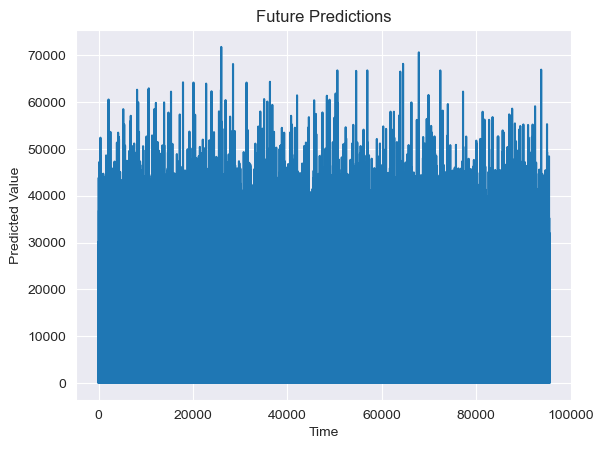

[[1.4240649e+03]
 [4.1808581e+00]
 [6.0897417e+03]
 ...
 [4.1639312e+03]
 [7.0091421e+03]
 [4.1808581e+00]]


In [29]:
# 시간에 따른 예측 값 그래프
# 
# 예측 값이 시간에 따라 어떻게 변하는지를 나타내는 그래프를 그릴 수 있습니다. 예를 들어, 시간에 따른 티켓 가격의 변화를 나타내는 라인 그래프를 그릴 수 있습니다.

import matplotlib.pyplot as plt

plt.figure()
plt.plot(future_predictions)
plt.title('Future Predictions')
plt.xlabel('Time')
plt.ylabel('Predicted Value')
plt.show()

print(future_predictions)

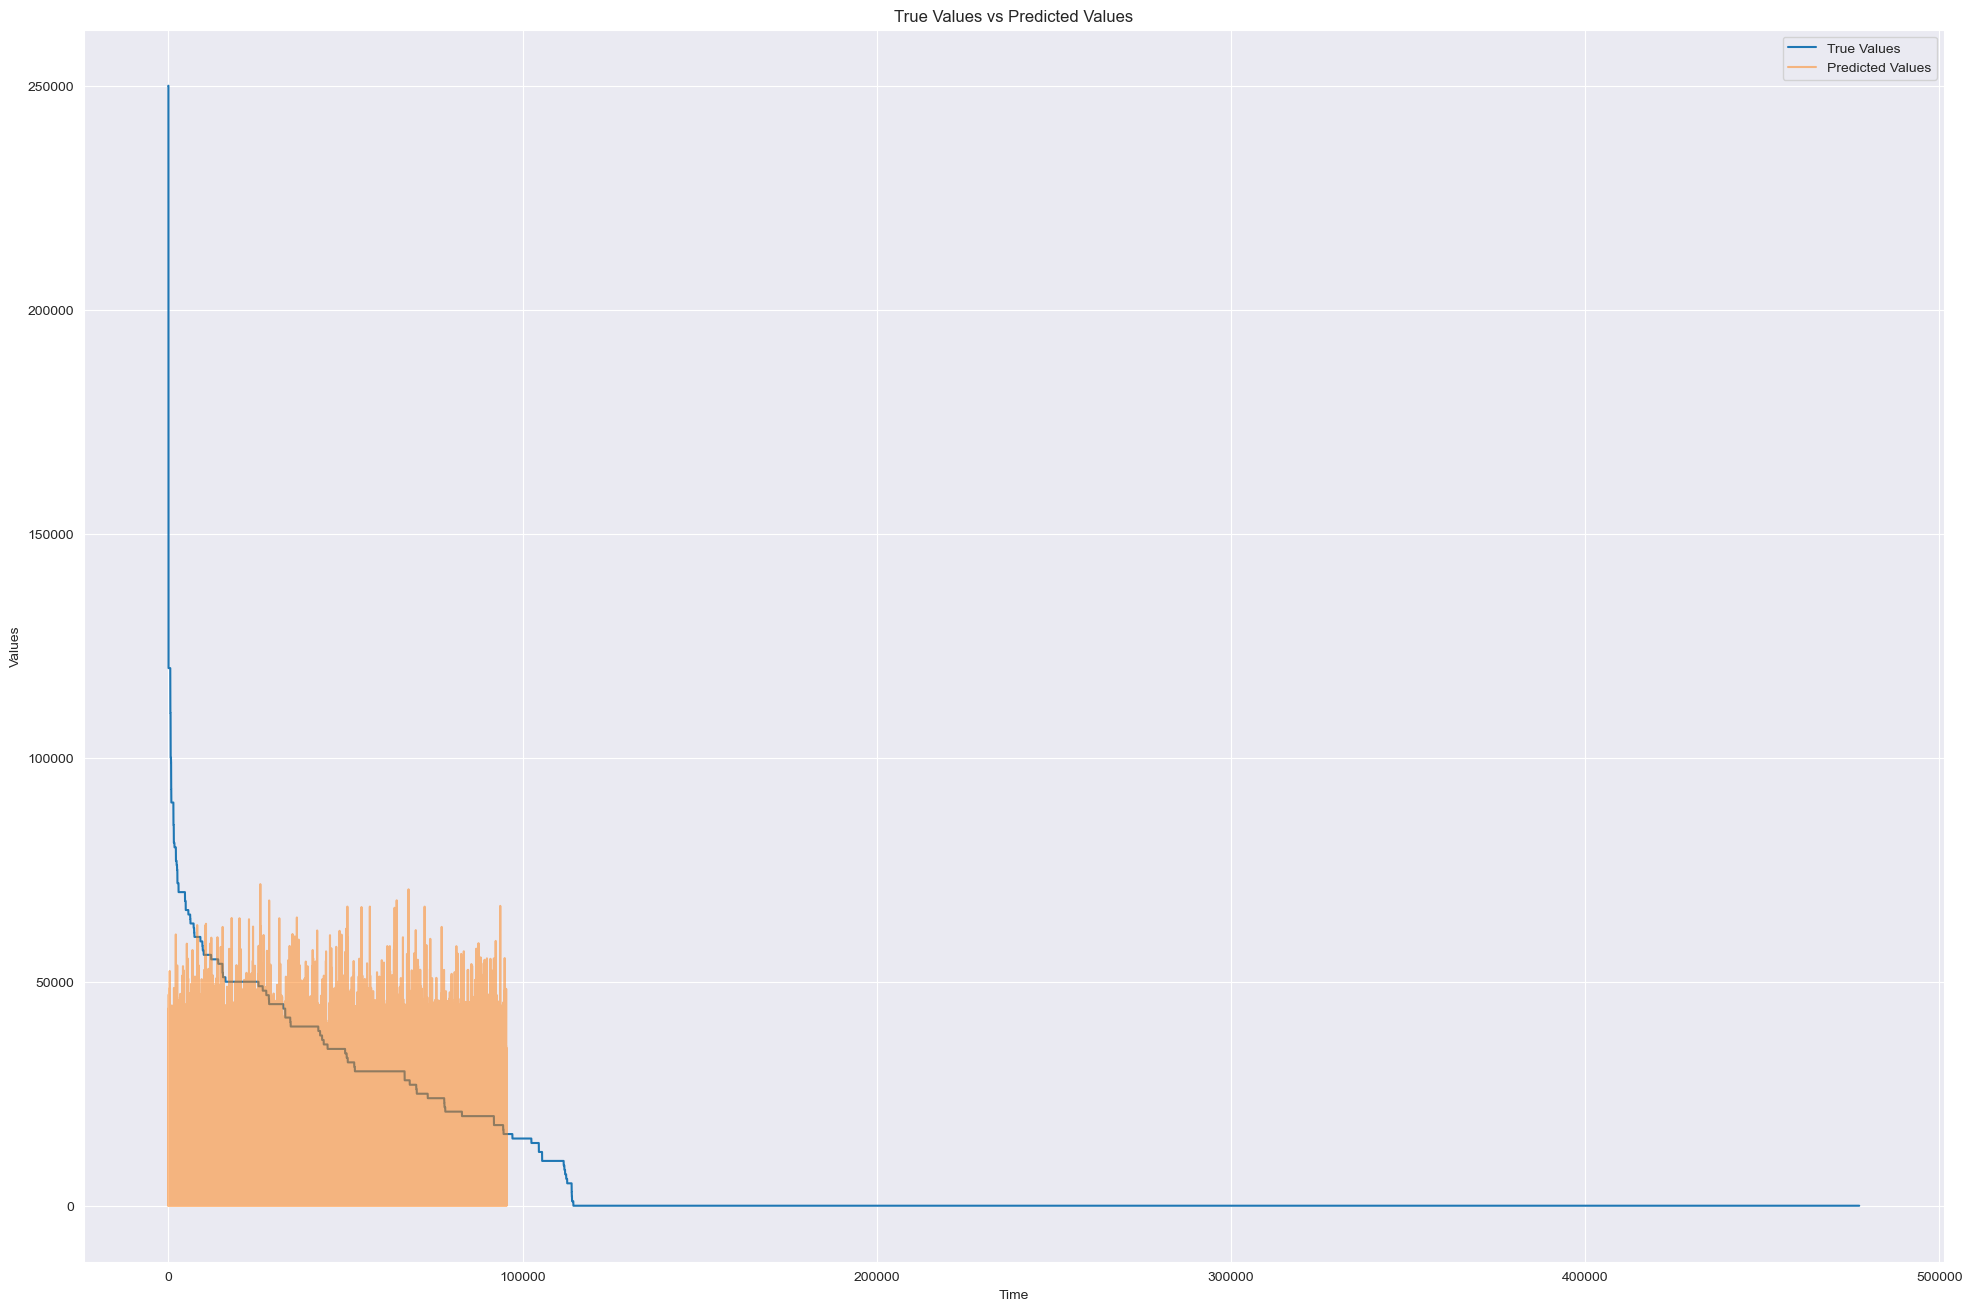

In [30]:

# 크기를 12x8로 설정하여 새로운 그림 생성
plt.figure(figsize=(24, 16))

# y의 실제 값을 그래프에 표시
plt.plot(y, label='True Values')

# future_predictions의 예측 값을 그래프에 표시
plt.plot(future_predictions, label='Predicted Values', alpha=0.5)

# 범례 추가
plt.legend()

# 그래프 제목 추가
plt.title('True Values vs Predicted Values')

# X축과 Y축의 라벨 추가
plt.xlabel('Time')
plt.ylabel('Values')

# 그래프 표시
plt.show()